In [1]:
##Loading data
import os
os.environ["PTB_FOLDER_PATH"] = "/home/jupyter/data/files/ptbdb/1.0.0/"
import sys
sys.path.insert(0,"/home/jupyter/Cappy/ptd_data_handler")
sys.path.insert(0,"/home/jupyter/Cappy/signal_processing")
from ptb_data_formatter import *
from feature_extraction import *
from custom_processing import *
all_patient_data = get_formatted_ptb_data()
from ptb_xl_data_formatter import *
os.environ["PTB_XL_FOLDER_PATH"] = "/home/jupyter/data/physionet.org/files/ptb-xl/1.0.1"
#all_patient_data = get_formatted_ptb_xl_data()

In [2]:
np.random.seed(42)

In [3]:
import pandas as pd

In [4]:
# Create individual df for each class
mi_df = pd.DataFrame()
norm_df = pd.DataFrame()

for recording in all_patient_data.keys():
    label = all_patient_data[recording]["diagnostic_class"][0]
    signal = all_patient_data[recording]["i"]
    patient = str.split(recording, "_")[0]
    # Clean Signal
    signal = clean_ecg_signal(signal, old_fs=1000)
    signal = pd.DataFrame(signal)
    if label == "mi":
        mi_df[recording] = signal
    elif label == "norm":
        norm_df[recording] = signal
del(all_patient_data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]


In [5]:
norm_df

,patient185_ecg_id_1,patient267_ecg_id_1,patient121_ecg_id_1,patient263_ecg_id_1,patient238_ecg_id_1,patient279_ecg_id_1,patient279_ecg_id_2,patient279_ecg_id_3,patient279_ecg_id_4,patient234_ecg_id_1,...,patient233_ecg_id_2,patient233_ecg_id_3,patient233_ecg_id_4,patient233_ecg_id_5,patient165_ecg_id_1,patient165_ecg_id_2,patient264_ecg_id_1,patient244_ecg_id_1,patient229_ecg_id_1,patient229_ecg_id_2
0,-0.007450,0.005031,0.037768,-0.012698,-0.003831,-0.035559,0.000097,0.000582,-0.022679,0.001611,...,0.007778,0.002087,-0.010495,0.001218,-0.011426,0.029878,0.017532,0.001139,0.002479,0.013193
1,0.043165,0.088465,0.057059,-0.032886,-0.229358,-0.024130,0.038614,-0.038666,-0.093237,0.146267,...,0.032780,-0.051864,0.030002,0.077663,-0.017216,0.066230,0.154881,-0.039311,0.046535,0.008839
2,0.080236,0.150003,0.071064,-0.047486,-0.395609,-0.015832,0.066625,-0.067484,-0.145026,0.253603,...,0.050581,-0.091185,0.059639,0.133968,-0.021417,0.094230,0.256113,-0.068602,0.078319,0.006328
3,0.099562,0.182171,0.078035,-0.054889,-0.482828,-0.011576,0.080912,-0.082474,-0.171834,0.310900,...,0.059188,-0.111128,0.074972,0.163265,-0.023543,0.111265,0.308898,-0.083170,0.094148,0.006143
4,0.105197,0.190282,0.079143,-0.056694,-0.506331,-0.010441,0.084384,-0.086365,-0.178579,0.327250,...,0.061137,-0.115605,0.078983,0.170579,-0.024006,0.119572,0.322213,-0.086202,0.097510,0.007599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52895,0.035602,-0.017947,-0.004979,-0.021060,-0.000489,0.138505,-0.001177,-0.036444,0.106852,-0.006627,...,-0.008818,0.006891,-0.004883,-0.010118,-0.010202,-0.011407,0.010555,-0.023214,-0.009098,-0.003583
52896,0.034945,-0.018373,-0.003738,-0.021137,-0.000258,0.141661,-0.001204,-0.036261,0.109367,-0.006445,...,-0.008992,0.002046,-0.005186,-0.009874,-0.009524,-0.008722,0.013116,-0.020401,-0.009327,-0.002056
52897,0.031234,-0.018709,-0.003474,-0.021268,-0.000083,0.143984,-0.001225,-0.036018,0.111198,-0.006296,...,-0.009153,-0.001735,-0.005330,-0.010546,-0.008640,-0.007986,0.015185,-0.017782,-0.009265,-0.000881
52898,0.023500,-0.018914,-0.004439,-0.021401,0.000001,0.145000,-0.001237,-0.035744,0.111933,-0.006207,...,-0.009284,-0.004843,-0.005337,-0.011743,-0.007687,-0.010030,0.016413,-0.015572,-0.008819,-0.000955


In [6]:
mi_df

,patient078_ecg_id_1,patient078_ecg_id_2,patient078_ecg_id_3,patient078_ecg_id_4,patient041_ecg_id_1,patient041_ecg_id_2,patient041_ecg_id_3,patient041_ecg_id_4,patient021_ecg_id_1,patient021_ecg_id_2,...,patient047_ecg_id_2,patient047_ecg_id_3,patient027_ecg_id_1,patient027_ecg_id_2,patient027_ecg_id_3,patient072_ecg_id_1,patient072_ecg_id_2,patient072_ecg_id_3,patient072_ecg_id_4,patient138_ecg_id_1
0,-0.001367,0.167053,-0.015405,0.001347,0.002314,0.004395,-0.000270,-0.013669,0.017418,-0.009918,...,-0.036392,-0.071345,-0.000776,-0.005744,0.002388,0.005031,0.002609,-0.005364,-0.075567,0.033117
1,-0.396121,0.443488,-0.113500,0.367616,0.006800,0.027220,-0.378008,-0.136785,-0.206214,-0.416515,...,-0.513773,-0.850875,0.522592,0.148061,-0.011908,0.107534,-0.068592,-0.022838,-0.283758,-0.034713
2,-0.688576,0.657799,-0.184503,0.640109,0.010505,0.044159,-0.659299,-0.227525,-0.372032,-0.718190,...,-0.868191,-1.428538,0.912111,0.262083,-0.022513,0.184012,-0.121969,-0.035211,-0.439632,-0.083987
3,-0.844070,0.791232,-0.219922,0.786496,0.013017,0.052832,-0.811289,-0.274995,-0.459632,-0.879316,...,-1.058611,-1.736524,1.122585,0.322916,-0.028229,0.226355,-0.151336,-0.041183,-0.525988,-0.108950
4,-0.888831,0.862578,-0.227485,0.829139,0.014207,0.054020,-0.857977,-0.287510,-0.482640,-0.926220,...,-1.116900,-1.826680,1.187435,0.340546,-0.029993,0.241977,-0.160720,-0.042612,-0.556929,-0.114484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52895,-0.288084,0.183804,-0.335751,0.247288,0.010313,0.005335,-0.311554,-0.095738,-0.129224,-0.305761,...,-0.360120,-0.614622,0.393444,0.159805,-0.018753,0.050241,-0.068457,-0.013504,-0.145492,NaN
52896,-0.284588,0.180866,-0.313842,0.240636,0.010109,0.006156,-0.303657,-0.094276,-0.130587,-0.299468,...,-0.353285,-0.602963,0.383263,0.154473,-0.018030,0.051321,-0.067890,-0.013274,-0.144311,NaN
52897,-0.255015,0.161439,-0.279351,0.214654,0.009623,0.005666,-0.272240,-0.085222,-0.119286,-0.268333,...,-0.316438,-0.538925,0.341494,0.137065,-0.016536,0.045905,-0.061892,-0.011993,-0.130491,NaN
52898,-0.191358,0.120678,-0.231621,0.162820,0.008590,0.003250,-0.210147,-0.065942,-0.090234,-0.204399,...,-0.239885,-0.407748,0.258728,0.104707,-0.013949,0.031592,-0.047996,-0.009333,-0.099524,NaN


In [7]:
# Delete any column in which any reading is NaN
norm_df = norm_df.dropna(axis=1)
mi_df = mi_df.dropna(axis=1)

In [8]:
norm_df

,patient185_ecg_id_1,patient267_ecg_id_1,patient121_ecg_id_1,patient263_ecg_id_1,patient238_ecg_id_1,patient279_ecg_id_1,patient279_ecg_id_2,patient279_ecg_id_3,patient279_ecg_id_4,patient234_ecg_id_1,...,patient233_ecg_id_2,patient233_ecg_id_3,patient233_ecg_id_4,patient233_ecg_id_5,patient165_ecg_id_1,patient165_ecg_id_2,patient264_ecg_id_1,patient244_ecg_id_1,patient229_ecg_id_1,patient229_ecg_id_2
0,-0.007450,0.005031,0.037768,-0.012698,-0.003831,-0.035559,0.000097,0.000582,-0.022679,0.001611,...,0.007778,0.002087,-0.010495,0.001218,-0.011426,0.029878,0.017532,0.001139,0.002479,0.013193
1,0.043165,0.088465,0.057059,-0.032886,-0.229358,-0.024130,0.038614,-0.038666,-0.093237,0.146267,...,0.032780,-0.051864,0.030002,0.077663,-0.017216,0.066230,0.154881,-0.039311,0.046535,0.008839
2,0.080236,0.150003,0.071064,-0.047486,-0.395609,-0.015832,0.066625,-0.067484,-0.145026,0.253603,...,0.050581,-0.091185,0.059639,0.133968,-0.021417,0.094230,0.256113,-0.068602,0.078319,0.006328
3,0.099562,0.182171,0.078035,-0.054889,-0.482828,-0.011576,0.080912,-0.082474,-0.171834,0.310900,...,0.059188,-0.111128,0.074972,0.163265,-0.023543,0.111265,0.308898,-0.083170,0.094148,0.006143
4,0.105197,0.190282,0.079143,-0.056694,-0.506331,-0.010441,0.084384,-0.086365,-0.178579,0.327250,...,0.061137,-0.115605,0.078983,0.170579,-0.024006,0.119572,0.322213,-0.086202,0.097510,0.007599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52895,0.035602,-0.017947,-0.004979,-0.021060,-0.000489,0.138505,-0.001177,-0.036444,0.106852,-0.006627,...,-0.008818,0.006891,-0.004883,-0.010118,-0.010202,-0.011407,0.010555,-0.023214,-0.009098,-0.003583
52896,0.034945,-0.018373,-0.003738,-0.021137,-0.000258,0.141661,-0.001204,-0.036261,0.109367,-0.006445,...,-0.008992,0.002046,-0.005186,-0.009874,-0.009524,-0.008722,0.013116,-0.020401,-0.009327,-0.002056
52897,0.031234,-0.018709,-0.003474,-0.021268,-0.000083,0.143984,-0.001225,-0.036018,0.111198,-0.006296,...,-0.009153,-0.001735,-0.005330,-0.010546,-0.008640,-0.007986,0.015185,-0.017782,-0.009265,-0.000881
52898,0.023500,-0.018914,-0.004439,-0.021401,0.000001,0.145000,-0.001237,-0.035744,0.111933,-0.006207,...,-0.009284,-0.004843,-0.005337,-0.011743,-0.007687,-0.010030,0.016413,-0.015572,-0.008819,-0.000955


In [9]:
mi_df

,patient078_ecg_id_1,patient078_ecg_id_2,patient078_ecg_id_3,patient078_ecg_id_4,patient041_ecg_id_1,patient041_ecg_id_2,patient041_ecg_id_3,patient041_ecg_id_4,patient021_ecg_id_1,patient021_ecg_id_2,...,patient047_ecg_id_1,patient047_ecg_id_2,patient047_ecg_id_3,patient027_ecg_id_1,patient027_ecg_id_2,patient027_ecg_id_3,patient072_ecg_id_1,patient072_ecg_id_2,patient072_ecg_id_3,patient072_ecg_id_4
0,-0.001367,0.167053,-0.015405,0.001347,0.002314,0.004395,-0.000270,-0.013669,0.017418,-0.009918,...,-0.019335,-0.036392,-0.071345,-0.000776,-0.005744,0.002388,0.005031,0.002609,-0.005364,-0.075567
1,-0.396121,0.443488,-0.113500,0.367616,0.006800,0.027220,-0.378008,-0.136785,-0.206214,-0.416515,...,-0.404604,-0.513773,-0.850875,0.522592,0.148061,-0.011908,0.107534,-0.068592,-0.022838,-0.283758
2,-0.688576,0.657799,-0.184503,0.640109,0.010505,0.044159,-0.659299,-0.227525,-0.372032,-0.718190,...,-0.692384,-0.868191,-1.428538,0.912111,0.262083,-0.022513,0.184012,-0.121969,-0.035211,-0.439632
3,-0.844070,0.791232,-0.219922,0.786496,0.013017,0.052832,-0.811289,-0.274995,-0.459632,-0.879316,...,-0.848183,-1.058611,-1.736524,1.122585,0.322916,-0.028229,0.226355,-0.151336,-0.041183,-0.525988
4,-0.888831,0.862578,-0.227485,0.829139,0.014207,0.054020,-0.857977,-0.287510,-0.482640,-0.926220,...,-0.895127,-1.116900,-1.826680,1.187435,0.340546,-0.029993,0.241977,-0.160720,-0.042612,-0.556929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52895,-0.288084,0.183804,-0.335751,0.247288,0.010313,0.005335,-0.311554,-0.095738,-0.129224,-0.305761,...,0.269553,-0.360120,-0.614622,0.393444,0.159805,-0.018753,0.050241,-0.068457,-0.013504,-0.145492
52896,-0.284588,0.180866,-0.313842,0.240636,0.010109,0.006156,-0.303657,-0.094276,-0.130587,-0.299468,...,0.225267,-0.353285,-0.602963,0.383263,0.154473,-0.018030,0.051321,-0.067890,-0.013274,-0.144311
52897,-0.255015,0.161439,-0.279351,0.214654,0.009623,0.005666,-0.272240,-0.085222,-0.119286,-0.268333,...,0.221099,-0.316438,-0.538925,0.341494,0.137065,-0.016536,0.045905,-0.061892,-0.011993,-0.130491
52898,-0.191358,0.120678,-0.231621,0.162820,0.008590,0.003250,-0.210147,-0.065942,-0.090234,-0.204399,...,0.259865,-0.239885,-0.407748,0.258728,0.104707,-0.013949,0.031592,-0.047996,-0.009333,-0.099524


In [10]:
# Shuffle the order of the ecg recordings
import random
norm_cols = norm_df.columns.to_list()
random.shuffle(norm_cols)
mi_cols = mi_df.columns.to_list()
random.shuffle(mi_cols)
norm_df = norm_df[norm_cols]
mi_df = mi_df[mi_cols]

In [11]:
print("Number of norm cases: ")
print(len(norm_df.columns))
print("Number of MI cases: ")
print(len(mi_df.columns))

Number of norm cases: 
79
Number of MI cases: 
349


In [12]:
beat_len = 512

mi_beats_df = pd.DataFrame()
for ecg in mi_df.columns:
    _mi_beats = []
    sig = mi_df[ecg].to_numpy()
    peaks = apply_pan_tompkins(sig, n_beats=False, standardize=True)
    for peak in peaks.keys():
        p = peaks[peak]
        _mi_beats.append(p)
        
    _mi_beats = np.array(_mi_beats)
    df = pd.DataFrame(np.reshape(_mi_beats, [-1,beat_len]))
    df['patient_id'] = str.split(ecg, "_")[0]
    mi_beats_df = pd.concat([mi_beats_df, df])
    
norm_beats_df = pd.DataFrame()
for ecg in norm_df.columns:
    _norm_beats = []
    sig = norm_df[ecg].to_numpy()
    peaks = apply_pan_tompkins(sig, n_beats=False, standardize=True)
    for peak in peaks.keys():
        p = peaks[peak]
        _norm_beats.append(p)
    
    _norm_beats = np.array(_norm_beats)
    df = pd.DataFrame(np.reshape(_norm_beats, [-1,beat_len]))
    df['patient_id'] = str.split(ecg, "_")[0]
    norm_beats_df = pd.concat([norm_beats_df, df])

mi_beats_df['label'] = 1
norm_beats_df['label'] = 0
    
print(mi_beats_df.shape)
print(norm_beats_df.shape)


(51022, 514)
(10086, 514)


In [13]:
mi_beats_df

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,patient_id,label
0,0.841052,0.832588,0.793976,0.728316,0.640200,0.537443,0.430168,0.327711,0.237714,0.166452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient081,1
1,0.863409,0.848133,0.800330,0.723798,0.624933,0.513693,0.401588,0.298450,0.211498,0.145446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient081,1
2,0.872423,0.853553,0.801977,0.722074,0.620920,0.508856,0.397033,0.294247,0.206746,0.138891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient081,1
3,0.927233,0.914590,0.865325,0.782644,0.673273,0.548123,0.419831,0.299418,0.195772,0.115733,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient081,1
4,0.960299,0.949619,0.901896,0.819188,0.707168,0.576528,0.440878,0.312834,0.202402,0.116585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient081,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.967234,0.961344,0.921064,0.855658,0.777598,0.698730,0.628117,0.571112,0.529463,0.502367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient098,1
141,0.984509,0.966262,0.915789,0.842797,0.759749,0.678520,0.608165,0.553586,0.515480,0.491886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient098,1
142,0.995256,0.985746,0.941553,0.870822,0.785603,0.698883,0.621574,0.560294,0.516781,0.489218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient098,1
143,0.975490,0.961048,0.913875,0.842550,0.760218,0.680567,0.613508,0.562790,0.526947,0.502276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,patient098,1


In [14]:
# Train/test split
def split_train_test(x, test_size=4):
    patients = np.unique(x["patient_id"])
    counter = 0
    x_train = pd.DataFrame()
    x_test = pd.DataFrame()
    for patient in np.unique(patients):
        #print(patient)
        if counter < test_size:
            x_train = pd.concat([x_train, x.loc[x["patient_id"]==patient]])
            counter = counter + 1
        else:
            x_test = pd.concat([x_test, x.loc[x["patient_id"]==patient]])
            counter = 0
    return x_train, x_test

mi_train_df, mi_test_df = split_train_test(mi_beats_df)
norm_train_df, norm_test_df = split_train_test(norm_beats_df)

print(mi_train_df.shape, mi_test_df.shape)
print(norm_train_df.shape, norm_test_df.shape)


(40581, 514) (10441, 514)
(8259, 514) (1827, 514)


In [15]:
mi_weight = (1/mi_train_df.shape[0]) * ((mi_train_df.shape[0]+norm_train_df.shape[0])/2) 
norm_weight = (1/norm_train_df.shape[0]) * ((mi_train_df.shape[0]+norm_train_df.shape[0])/2) 

weights = {0:mi_weight, 1:norm_weight}
print(mi_weight, norm_weight)

0.6017594440748134 2.95677442789684


In [16]:
# Balancing data
def balance_dataset(x, y, method):
    from imblearn.over_sampling import SMOTE
    if method == 'random':
        return
    if method == 'SMOTE':
        sm = SMOTE()
        x_res, y_res = sm.fit_resample(x, y)
        return x_res, y_res

mi_train_df_down = mi_train_df.sample(frac=0.5)[0:len(mi_train_df)]
norm_train_df_up = pd.concat([norm_train_df,norm_train_df.sample(frac=1),norm_train_df.sample(frac=1)])

In [17]:
print(mi_train_df.shape, mi_test_df.shape)
print(norm_train_df_up.shape, norm_test_df.shape)

(40581, 514) (10441, 514)
(24777, 514) (1827, 514)


In [18]:
# Generate Tensors
def create_tensor(x, seq_length=8, step=1, shuffle=True, binary=-1):
    label = x["label"].to_numpy()[0]
    oh_label = [0,0,0]
    oh_label[label] = 1
    x_tensor = []
    y_tensor = []
    for patient in np.unique(x["patient_id"]):
        df = x.loc[x["patient_id"]==patient]
        df = df.drop(columns=["patient_id","label"])
        arr = df.to_numpy()
        for i in range(0,int(((np.shape(arr)[0]-seq_length)/step)+1),step):
            # shuffle order of sequence of beats here
            if shuffle:
                x_tensor.append(pd.DataFrame(arr[i:i+seq_length,:]).sample(frac=1).to_numpy())
                y_tensor.append(oh_label)
            else:
                x_tensor.append(pd.DataFrame(arr[i:i+seq_length,:]).to_numpy())
                y_tensor.append(oh_label)
                
    if binary == 0:
        y_tensor = np.zeros((np.shape(x_tensor)[0],1))
        
    elif binary == 1:
        y_tensor = np.ones((np.shape(x_tensor)[0],1))
    return x_tensor, y_tensor

x_mi_train, y_mi_train = create_tensor(mi_train_df, binary=1)
x_mi_test, y_mi_test = create_tensor(mi_test_df, binary=1)
x_norm_train, y_norm_train = create_tensor(norm_train_df, binary=0)
x_norm_test, y_norm_test = create_tensor(norm_test_df, binary=0)

print(np.shape(x_mi_train), np.shape(x_norm_train))

x_train = []
x_test = []
y_train = []
y_test = []
x_train = np.concatenate([x_mi_train, x_norm_train], axis=0)
x_test = np.concatenate([x_mi_test, x_norm_test], axis=0)
y_train = np.concatenate([y_mi_train, y_norm_train], axis=0)
y_test = np.concatenate([y_mi_test, y_norm_test], axis=0)

from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)
print(np.shape(x_train), np.shape(y_train))
print(np.shape(x_test), np.shape(y_test))

(39825, 8, 512) (7965, 8, 512)
(47790, 8, 512) (47790, 1)
(12016, 8, 512) (12016, 1)


In [24]:
## ORIGINAL HYPERPARAMETERS FROM PAPER
import tensorflow as tf

seq_length = 8
beat_length = 512
num_feats = 1

## Layer 0 - input
input = tf.keras.Input(shape=(seq_length, beat_length, num_feats))

## Layers 1-6 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 7-12 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 13-19 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 19-24 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 25 - time-distributed flatten
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)

## Layer 26 - time-distributed dense
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu'))(x)

## Layer 27 - time-distributed batch norm
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)

## Layer 28 - time-distributed dropout
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 29 - LSTM
x = tf.keras.layers.LSTM(32)(x)

## Layer 30 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 31 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 32 - dense
x = tf.keras.layers.Dense(32, activation='relu')(x)

## Layer 33 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 34 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 35 - output
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

cnn_lstm_model = tf.keras.Model(input, output, name="cnn_lstm_model")
cnn_lstm_model.summary()

2022-02-23 02:34:21.242351: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "cnn_lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8, 512, 1)]       0         
                                                                 
 time_distributed (TimeDistr  (None, 8, 512, 32)       128       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 8, 512, 32)       128       
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 8, 512, 32)       3104      
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 8, 512, 32)       128       
 tributed)                                          

In [25]:
cnn_lstm_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])



In [26]:
import datetime

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
path = ""
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=path,
    save_weights_only=False,
    monitor='val_loss',
    mode='max',
    save_best_only=True)


In [27]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 19625), started 0:10:04 ago. (Use '!kill 19625' to kill it.)

In [30]:
cnn_lstm_model.fit(x=x_train, y=y_train, validation_data=[x_test, y_test], batch_size=32, epochs=1, verbose=True, callbacks=[callback, tensorboard_callback, model_checkpoint_callback], class_weight=weights)

 135/1494 [=>............................] - ETA: 14:54 - loss: 1.8004 - binary_accuracy: 0.6086

KeyboardInterrupt: 

In [35]:
curr_model = "conv_16_conv_filter_6_pool_size_3_dropout_0.6_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_256"
model = tf.keras.models.load_model("saved_models/cnn_lstm/" + curr_model)

In [36]:
y_test = (y_test).astype(int)
y_pred = model.predict(x_test)
y_pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


MI Sensitivity:  0.8537782956058588
MI Specificity:  nan


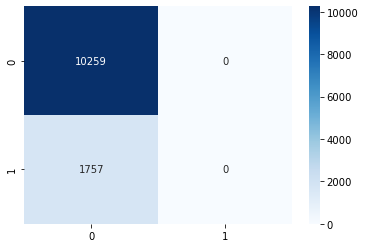

In [37]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
cf_matrix = multilabel_confusion_matrix(y_test, y_pred)
mi_sens = (cf_matrix[0][0][0])/(cf_matrix[0][0][0]+cf_matrix[0][1][0])
mi_spec = (cf_matrix[0][1][1])/(cf_matrix[0][1][1]+cf_matrix[0][0][1])
sns.heatmap(cf_matrix[0], annot=True, cmap="Blues", fmt='g')
print("MI Sensitivity: ", mi_sens)
print("MI Specificity: ", mi_spec)

Other CVD Sensitivity:  nan
Other CVD Specificity:  0.8537782956058588


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


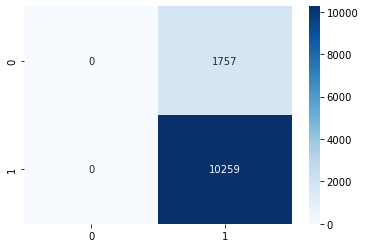

In [38]:
sns.heatmap(cf_matrix[1], annot=True, cmap="Blues", fmt='g')
non_mi_sens = (cf_matrix[1][0][0])/(cf_matrix[1][0][0]+cf_matrix[1][1][0])
non_mi_spec = (cf_matrix[1][1][1])/(cf_matrix[1][1][1]+cf_matrix[1][0][1])
print("Other CVD Sensitivity: ", non_mi_sens)
print("Other CVD Specificity: ", non_mi_spec)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report

              precision    recall  f1-score   support

          MI       0.00      0.00      0.00      1757
     Healthy       0.85      1.00      0.92     10259

    accuracy                           0.85     12016
   macro avg       0.43      0.50      0.46     12016
weighted avg       0.73      0.85      0.79     12016



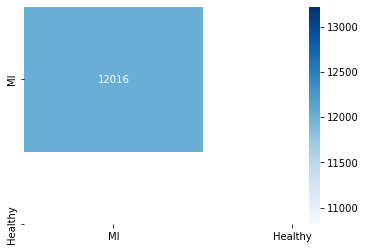

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', xticklabels=['MI','Healthy'], yticklabels=['MI', 'Healthy'])
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['MI', 'Healthy']))

In [22]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
## Random search over hyperparameter space
import random
import tensorflow as tf
import datetime
from sklearn.metrics import f1_score

conv_layers = [8,16,32]
conv_filters = [2,3,6]
pool_sizes = [2,3,4]
dropouts = [0.4,0.5,0.6]
denses = [8,16,32,64,128]
lstms = [16,32,64]
lrs = [1e-2, 1e-1] 
opts = ["Adam", "RMSProp", "Adagrad"]
batch_sizes = [32,64,128,256, 512]
best_model = ""
best_f1 = 0
model_df = pd.DataFrame(columns = ["model_name", "f1_score"])

for i in range(50):
    conv_layer = random.choice(conv_layers)
    conv_filter = random.choice(conv_filters)
    pool_size = random.choice(pool_sizes)
    dropout = random.choice(dropouts)
    dense = random.choice(denses)
    lstm = random.choice(lstms)
    lr = random.choice(lrs)
    opt = random.choice(opts)
    batch_size = random.choice(batch_sizes)
    
    model_name = "conv_" + str(conv_layer) + "_conv_filter_" + str(conv_filter) + "_pool_size_" + str(pool_size) + "_dropout_" + str(dropout) + "_dense_" + str(dense) + "_lstm_" + str(lstm) +  "_lr_" + str(lr) +  "_opt_" + str(opt) +  "_batch_size_" + str(batch_size)
    path = "saved_models/cnn_lstm/" + model_name
    
    seq_length = 8
    beat_length = 512
    num_feats = 1

    ## Layer 0 - input
    input = tf.keras.Input(shape=(seq_length, beat_length, num_feats))

    ## Layers 1-6 - time-distributed convolutional block
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(input)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=pool_size))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layers 7-12 - time-distributed convolutional block
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=pool_size))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layers 13-19 - time-distributed convolutional block
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=pool_size))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layers 19-24 - time-distributed convolutional block
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(conv_layer, conv_filter, padding='same', activation='relu'))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=pool_size))(x)
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layer 25 - time-distributed flatten
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)

    ## Layer 26 - time-distributed dense
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(dense, activation='relu'))(x)

    ## Layer 27 - time-distributed batch norm
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)

    ## Layer 28 - time-distributed dropout
    x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(dropout))(x)

    ## Layer 29 - LSTM
    x = tf.keras.layers.LSTM(lstm)(x)

    ## Layer 30 - batch norm
    x = tf.keras.layers.BatchNormalization()(x)

    ## Layer 31 - dropout
    x = tf.keras.layers.Dropout(dropout)(x)

    ## Layer 32 - dense
    x = tf.keras.layers.Dense(dense, activation='relu')(x)

    ## Layer 33 - batch norm
    x = tf.keras.layers.BatchNormalization()(x)

    ## Layer 34 - dropout
    x = tf.keras.layers.Dropout(dropout)(x)

    ## Layer 35 - output
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    cnn_lstm_model_all = tf.keras.Model(input, output, name=model_name)
    #cnn_lstm_model_all.summary()
    
    if opt == "Adam":
        opt_ = tf.keras.optimizers.Adam(learning_rate=lr)
    elif opt == "SGD":
        opt_ = tf.keras.optimizers.SGD(learning_rate=lr)
    elif opt == "RMSProp":
        opt_ = tf.keras.optimizers.RMSprop(learning_rate=lr)
    elif opt == "Adagrad":
        opt_ = tf.keras.optimizers.Adagrad(learning_rate=lr)
    
    cnn_lstm_model_all.compile(optimizer=opt_, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=path,
        save_weights_only=False,
        monitor='val_loss',
        mode='max',
        save_best_only=True)
    
    print(" ----------------------- CURRENTLY TRAINING MODEL ------------------------- ")
    print(model_name)
    cnn_lstm_model_all.fit(x=x_train, y=y_train, validation_data=[x_test, y_test], batch_size=batch_size, epochs=100, verbose=True, callbacks=[callback, tensorboard_callback, model_checkpoint_callback], class_weight=weights)
    
    model_4_labels_pred = cnn_lstm_model_all.predict(x_test)
    model_4_labels_test_score = (y_test).astype(int)
    model_4_labels_pred_score = (model_4_labels_pred == model_4_labels_pred.max(axis=1)[:,None]).astype(int)
    f1 = f1_score(model_4_labels_test_score, model_4_labels_pred_score, average="macro")
    if f1 > best_f1:
        best_model = model_name
        best_f1 = f1
    print(" ----------------------- CURRENT BEST MODEL ------------------------- ")
    print(best_model)
    print("F1 SCORE: " + str(best_f1))
    to_add = [model_name,f1]
    model_df = model_df.append(pd.Series(to_add, index=["model_name","f1_score"]), ignore_index=True)
    model_df.to_csv("saved_models/cnn_lstm/training_results_binary_3.csv")
    
    

2022-02-23 02:50:43.227586: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


 ----------------------- CURRENTLY TRAINING MODEL ------------------------- 
conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32
Epoch 1/100
1494/1494 [==============================] - ETA: 0s - loss: 0.4148 - binary_accuracy: 0.8321 - auc: 0.6941 - precision: 0.8335 - recall: 0.9978

2022-02-23 03:02:32.430054: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


1494/1494 [==============================] - 736s 489ms/step - loss: 0.4148 - binary_accuracy: 0.8321 - auc: 0.6941 - precision: 0.8335 - recall: 0.9978 - val_loss: 0.5294 - val_binary_accuracy: 0.8538 - val_auc: 0.7589 - val_precision: 0.8538 - val_recall: 1.0000
Epoch 2/100
1494/1494 [==============================] - ETA: 0s - loss: 0.3199 - binary_accuracy: 0.8418 - auc: 0.8642 - precision: 0.8417 - recall: 0.9979

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


1494/1494 [==============================] - 801s 536ms/step - loss: 0.3199 - binary_accuracy: 0.8418 - auc: 0.8642 - precision: 0.8417 - recall: 0.9979 - val_loss: 0.5484 - val_binary_accuracy: 0.8517 - val_auc: 0.7430 - val_precision: 0.8561 - val_recall: 0.9932
Epoch 3/100
1494/1494 [==============================] - 629s 421ms/step - loss: 0.2763 - binary_accuracy: 0.8643 - auc: 0.9049 - precision: 0.8629 - recall: 0.9953 - val_loss: 0.5237 - val_binary_accuracy: 0.8759 - val_auc: 0.7359 - val_precision: 0.8803 - val_recall: 0.9892
Epoch 4/100
1494/1494 [==============================] - 664s 445ms/step - loss: 0.2467 - binary_accuracy: 0.8828 - auc: 0.9239 - precision: 0.8804 - recall: 0.9945 - val_loss: 0.5338 - val_binary_accuracy: 0.8996 - val_auc: 0.7582 - val_precision: 0.8949 - val_recall: 0.9998
Epoch 5/100
1494/1494 [==============================] - ETA: 0s - loss: 0.2247 - binary_accuracy: 0.8927 - auc: 0.9404 - precision: 0.8897 - recall: 0.9945

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


1494/1494 [==============================] - 721s 483ms/step - loss: 0.2247 - binary_accuracy: 0.8927 - auc: 0.9404 - precision: 0.8897 - recall: 0.9945 - val_loss: 0.6172 - val_binary_accuracy: 0.8988 - val_auc: 0.7251 - val_precision: 0.8946 - val_recall: 0.9992
Epoch 6/100
1494/1494 [==============================] - 607s 406ms/step - loss: 0.2054 - binary_accuracy: 0.9030 - auc: 0.9503 - precision: 0.8998 - recall: 0.9943 - val_loss: 0.6157 - val_binary_accuracy: 0.8758 - val_auc: 0.7290 - val_precision: 0.8764 - val_recall: 0.9949
Epoch 7/100
1494/1494 [==============================] - ETA: 0s - loss: 0.1928 - binary_accuracy: 0.9074 - auc: 0.9567 - precision: 0.9039 - recall: 0.9946

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


1494/1494 [==============================] - 679s 455ms/step - loss: 0.1928 - binary_accuracy: 0.9074 - auc: 0.9567 - precision: 0.9039 - recall: 0.9946 - val_loss: 0.6888 - val_binary_accuracy: 0.8949 - val_auc: 0.6895 - val_precision: 0.8904 - val_recall: 1.0000
Epoch 8/100
1494/1494 [==============================] - ETA: 0s - loss: 0.1836 - binary_accuracy: 0.9134 - auc: 0.9613 - precision: 0.9102 - recall: 0.9943

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


1494/1494 [==============================] - 668s 447ms/step - loss: 0.1836 - binary_accuracy: 0.9134 - auc: 0.9613 - precision: 0.9102 - recall: 0.9943 - val_loss: 0.7898 - val_binary_accuracy: 0.8558 - val_auc: 0.7074 - val_precision: 0.8614 - val_recall: 0.9904
Epoch 9/100
1494/1494 [==============================] - ETA: 0s - loss: 0.1727 - binary_accuracy: 0.9176 - auc: 0.9647 - precision: 0.9140 - recall: 0.9947

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


1494/1494 [==============================] - 713s 478ms/step - loss: 0.1727 - binary_accuracy: 0.9176 - auc: 0.9647 - precision: 0.9140 - recall: 0.9947 - val_loss: 0.8081 - val_binary_accuracy: 0.8686 - val_auc: 0.6771 - val_precision: 0.8675 - val_recall: 0.9986
Epoch 10/100
1494/1494 [==============================] - ETA: 0s - loss: 0.1620 - binary_accuracy: 0.9213 - auc: 0.9691 - precision: 0.9178 - recall: 0.9947

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


1494/1494 [==============================] - 728s 487ms/step - loss: 0.1620 - binary_accuracy: 0.9213 - auc: 0.9691 - precision: 0.9178 - recall: 0.9947 - val_loss: 0.8473 - val_binary_accuracy: 0.8629 - val_auc: 0.6874 - val_precision: 0.8739 - val_recall: 0.9810
Epoch 11/100
1494/1494 [==============================] - 650s 435ms/step - loss: 0.1537 - binary_accuracy: 0.9288 - auc: 0.9701 - precision: 0.9253 - recall: 0.9948 - val_loss: 0.7922 - val_binary_accuracy: 0.8648 - val_auc: 0.6949 - val_precision: 0.8753 - val_recall: 0.9815
Epoch 12/100
1494/1494 [==============================] - ETA: 0s - loss: 0.1495 - binary_accuracy: 0.9288 - auc: 0.9729 - precision: 0.9255 - recall: 0.9947

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32/assets


1494/1494 [==============================] - 763s 511ms/step - loss: 0.1495 - binary_accuracy: 0.9288 - auc: 0.9729 - precision: 0.9255 - recall: 0.9947 - val_loss: 0.9399 - val_binary_accuracy: 0.8556 - val_auc: 0.5846 - val_precision: 0.8653 - val_recall: 0.9840
Epoch 13/100
1494/1494 [==============================] - 687s 460ms/step - loss: 0.1425 - binary_accuracy: 0.9348 - auc: 0.9734 - precision: 0.9314 - recall: 0.9951 - val_loss: 0.8980 - val_binary_accuracy: 0.8752 - val_auc: 0.6295 - val_precision: 0.8736 - val_recall: 0.9982
Epoch 00013: early stopping
 ----------------------- CURRENT BEST MODEL ------------------------- 
conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32
F1 SCORE: 0.4605611672278339
 ----------------------- CURRENTLY TRAINING MODEL ------------------------- 
conv_16_conv_filter_6_pool_size_4_dropout_0.4_dense_8_lstm_64_lr_0.01_opt_Adam_batch_size_64
Epoch 1/100
747/747 [==============================] - ETA: 0s 

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_4_dropout_0.4_dense_8_lstm_64_lr_0.01_opt_Adam_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_4_dropout_0.4_dense_8_lstm_64_lr_0.01_opt_Adam_batch_size_64/assets


747/747 [==============================] - 455s 577ms/step - loss: 0.4848 - binary_accuracy: 0.8261 - auc_1: 0.6348 - precision_1: 0.8336 - recall_1: 0.9886 - val_loss: 0.6125 - val_binary_accuracy: 0.8538 - val_auc_1: 0.6850 - val_precision_1: 0.8538 - val_recall_1: 1.0000
Epoch 2/100
747/747 [==============================] - 389s 521ms/step - loss: 0.3485 - binary_accuracy: 0.8373 - auc_1: 0.8247 - precision_1: 0.8380 - recall_1: 0.9977 - val_loss: 0.4140 - val_binary_accuracy: 0.8538 - val_auc_1: 0.8300 - val_precision_1: 0.8538 - val_recall_1: 1.0000
Epoch 3/100
747/747 [==============================] - 369s 493ms/step - loss: 0.2704 - binary_accuracy: 0.8694 - auc_1: 0.9092 - precision_1: 0.8672 - recall_1: 0.9959 - val_loss: 0.4970 - val_binary_accuracy: 0.9100 - val_auc_1: 0.7436 - val_precision_1: 0.9050 - val_recall_1: 0.9995
Epoch 4/100
747/747 [==============================] - 384s 514ms/step - loss: 0.2334 - binary_accuracy: 0.8865 - auc_1: 0.9381 - precision_1: 0.8836 -

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_4_dropout_0.4_dense_8_lstm_64_lr_0.01_opt_Adam_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_4_dropout_0.4_dense_8_lstm_64_lr_0.01_opt_Adam_batch_size_64/assets


747/747 [==============================] - 409s 548ms/step - loss: 0.1414 - binary_accuracy: 0.9368 - auc_1: 0.9737 - precision_1: 0.9328 - recall_1: 0.9959 - val_loss: 0.6354 - val_binary_accuracy: 0.8780 - val_auc_1: 0.7020 - val_precision_1: 0.8864 - val_recall_1: 0.9831
Epoch 10/100
747/747 [==============================] - ETA: 0s - loss: 0.1393 - binary_accuracy: 0.9376 - auc_1: 0.9753 - precision_1: 0.9333 - recall_1: 0.9963

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_4_dropout_0.4_dense_8_lstm_64_lr_0.01_opt_Adam_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_4_dropout_0.4_dense_8_lstm_64_lr_0.01_opt_Adam_batch_size_64/assets


747/747 [==============================] - 449s 602ms/step - loss: 0.1393 - binary_accuracy: 0.9376 - auc_1: 0.9753 - precision_1: 0.9333 - recall_1: 0.9963 - val_loss: 0.6772 - val_binary_accuracy: 0.8714 - val_auc_1: 0.7246 - val_precision_1: 0.8846 - val_recall_1: 0.9768
Epoch 11/100
747/747 [==============================] - ETA: 0s - loss: 0.1305 - binary_accuracy: 0.9436 - auc_1: 0.9783 - precision_1: 0.9398 - recall_1: 0.9961

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_4_dropout_0.4_dense_8_lstm_64_lr_0.01_opt_Adam_batch_size_64/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_4_dropout_0.4_dense_8_lstm_64_lr_0.01_opt_Adam_batch_size_64/assets


747/747 [==============================] - 443s 593ms/step - loss: 0.1305 - binary_accuracy: 0.9436 - auc_1: 0.9783 - precision_1: 0.9398 - recall_1: 0.9961 - val_loss: 0.7942 - val_binary_accuracy: 0.9011 - val_auc_1: 0.6834 - val_precision_1: 0.8990 - val_recall_1: 0.9961
Epoch 12/100
747/747 [==============================] - 375s 502ms/step - loss: 0.1211 - binary_accuracy: 0.9470 - auc_1: 0.9810 - precision_1: 0.9435 - recall_1: 0.9961 - val_loss: 0.5681 - val_binary_accuracy: 0.8912 - val_auc_1: 0.8092 - val_precision_1: 0.8971 - val_recall_1: 0.9857
Epoch 00012: early stopping
 ----------------------- CURRENT BEST MODEL ------------------------- 
conv_16_conv_filter_2_pool_size_2_dropout_0.5_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_32
F1 SCORE: 0.4605611672278339
 ----------------------- CURRENTLY TRAINING MODEL ------------------------- 
conv_16_conv_filter_6_pool_size_3_dropout_0.6_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_256
Epoch 1/100
187/187 [==================

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.6_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.6_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_256/assets


187/187 [==============================] - 316s 2s/step - loss: 0.5257 - binary_accuracy: 0.8232 - auc_2: 0.5840 - precision_2: 0.8337 - recall_2: 0.9841 - val_loss: 0.4375 - val_binary_accuracy: 0.8538 - val_auc_2: 0.5000 - val_precision_2: 0.8538 - val_recall_2: 1.0000
Epoch 2/100
187/187 [==============================] - 249s 1s/step - loss: 0.4188 - binary_accuracy: 0.8333 - auc_2: 0.6605 - precision_2: 0.8333 - recall_2: 1.0000 - val_loss: 0.4299 - val_binary_accuracy: 0.8538 - val_auc_2: 0.5664 - val_precision_2: 0.8538 - val_recall_2: 1.0000
Epoch 3/100
187/187 [==============================] - 233s 1s/step - loss: 0.4104 - binary_accuracy: 0.8333 - auc_2: 0.6762 - precision_2: 0.8333 - recall_2: 1.0000 - val_loss: 0.4300 - val_binary_accuracy: 0.8538 - val_auc_2: 0.7174 - val_precision_2: 0.8538 - val_recall_2: 1.0000
Epoch 4/100
187/187 [==============================] - 233s 1s/step - loss: 0.4059 - binary_accuracy: 0.8333 - auc_2: 0.6872 - precision_2: 0.8333 - recall_2: 1

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.6_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.6_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_256/assets


187/187 [==============================] - 293s 2s/step - loss: 0.3995 - binary_accuracy: 0.8333 - auc_2: 0.7026 - precision_2: 0.8333 - recall_2: 1.0000 - val_loss: 0.4381 - val_binary_accuracy: 0.8538 - val_auc_2: 0.7399 - val_precision_2: 0.8538 - val_recall_2: 1.0000
Epoch 7/100
187/187 [==============================] - 231s 1s/step - loss: 0.3989 - binary_accuracy: 0.8333 - auc_2: 0.7016 - precision_2: 0.8333 - recall_2: 1.0000 - val_loss: 0.4304 - val_binary_accuracy: 0.8538 - val_auc_2: 0.7403 - val_precision_2: 0.8538 - val_recall_2: 1.0000
Epoch 8/100
187/187 [==============================] - 251s 1s/step - loss: 0.3961 - binary_accuracy: 0.8333 - auc_2: 0.7102 - precision_2: 0.8333 - recall_2: 1.0000 - val_loss: 0.4217 - val_binary_accuracy: 0.8538 - val_auc_2: 0.7399 - val_precision_2: 0.8538 - val_recall_2: 1.0000
Epoch 9/100
187/187 [==============================] - 230s 1s/step - loss: 0.3942 - binary_accuracy: 0.8333 - auc_2: 0.7156 - precision_2: 0.8333 - recall_2: 1

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.6_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.6_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_256/assets


187/187 [==============================] - 291s 2s/step - loss: 0.3520 - binary_accuracy: 0.8337 - auc_2: 0.8236 - precision_2: 0.8338 - recall_2: 0.9997 - val_loss: 0.4452 - val_binary_accuracy: 0.8538 - val_auc_2: 0.6908 - val_precision_2: 0.8538 - val_recall_2: 1.0000
Epoch 16/100
187/187 [==============================] - ETA: 0s - loss: 0.3356 - binary_accuracy: 0.8352 - auc_2: 0.8511 - precision_2: 0.8355 - recall_2: 0.9990

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.6_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.6_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_256/assets


187/187 [==============================] - 304s 2s/step - loss: 0.3356 - binary_accuracy: 0.8352 - auc_2: 0.8511 - precision_2: 0.8355 - recall_2: 0.9990 - val_loss: 0.4970 - val_binary_accuracy: 0.8538 - val_auc_2: 0.7247 - val_precision_2: 0.8538 - val_recall_2: 1.0000
Epoch 17/100
187/187 [==============================] - 251s 1s/step - loss: 0.3165 - binary_accuracy: 0.8382 - auc_2: 0.8750 - precision_2: 0.8384 - recall_2: 0.9982 - val_loss: 0.4188 - val_binary_accuracy: 0.8541 - val_auc_2: 0.7647 - val_precision_2: 0.8541 - val_recall_2: 1.0000
Epoch 18/100
187/187 [==============================] - 239s 1s/step - loss: 0.3012 - binary_accuracy: 0.8444 - auc_2: 0.8887 - precision_2: 0.8445 - recall_2: 0.9970 - val_loss: 0.3453 - val_binary_accuracy: 0.8925 - val_auc_2: 0.8285 - val_precision_2: 0.9017 - val_recall_2: 0.9810
Epoch 19/100
187/187 [==============================] - 242s 1s/step - loss: 0.2880 - binary_accuracy: 0.8511 - auc_2: 0.8994 - precision_2: 0.8507 - recall_2

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.6_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_6_pool_size_3_dropout_0.6_dense_64_lstm_64_lr_0.1_opt_Adagrad_batch_size_256/assets


187/187 [==============================] - 293s 2s/step - loss: 0.2409 - binary_accuracy: 0.8870 - auc_2: 0.9257 - precision_2: 0.8840 - recall_2: 0.9950 - val_loss: 0.6242 - val_binary_accuracy: 0.8852 - val_auc_2: 0.7232 - val_precision_2: 0.8941 - val_recall_2: 0.9818
Epoch 24/100
187/187 [==============================] - 254s 1s/step - loss: 0.2294 - binary_accuracy: 0.8937 - auc_2: 0.9350 - precision_2: 0.8903 - recall_2: 0.9950 - val_loss: 0.5480 - val_binary_accuracy: 0.8838 - val_auc_2: 0.7294 - val_precision_2: 0.8943 - val_recall_2: 0.9797
Epoch 25/100
187/187 [==============================] - 201s 1s/step - loss: 0.2174 - binary_accuracy: 0.8983 - auc_2: 0.9404 - precision_2: 0.8947 - recall_2: 0.9950 - val_loss: 0.5126 - val_binary_accuracy: 0.8985 - val_auc_2: 0.7269 - val_precision_2: 0.9096 - val_recall_2: 0.9784
Epoch 26/100
187/187 [==============================] - 196s 1s/step - loss: 0.2144 - binary_accuracy: 0.9005 - auc_2: 0.9442 - precision_2: 0.8969 - recall_2

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.5_dense_16_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.5_dense_16_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


94/94 [==============================] - 194s 2s/step - loss: 0.7134 - binary_accuracy: 0.7982 - auc_3: 0.5444 - precision_3: 0.8343 - recall_3: 0.9456 - val_loss: 0.4964 - val_binary_accuracy: 0.8538 - val_auc_3: 0.5000 - val_precision_3: 0.8538 - val_recall_3: 1.0000
Epoch 2/100
94/94 [==============================] - ETA: 0s - loss: 0.3727 - binary_accuracy: 0.8340 - auc_3: 0.7840 - precision_3: 0.8342 - recall_3: 0.9994

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.5_dense_16_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_2_dropout_0.5_dense_16_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


94/94 [==============================] - 213s 2s/step - loss: 0.3727 - binary_accuracy: 0.8340 - auc_3: 0.7840 - precision_3: 0.8342 - recall_3: 0.9994 - val_loss: 0.7475 - val_binary_accuracy: 0.8538 - val_auc_3: 0.6638 - val_precision_3: 0.8538 - val_recall_3: 1.0000
Epoch 3/100
94/94 [==============================] - 145s 2s/step - loss: 0.3208 - binary_accuracy: 0.8400 - auc_3: 0.8670 - precision_3: 0.8403 - recall_3: 0.9976 - val_loss: 0.5501 - val_binary_accuracy: 0.8538 - val_auc_3: 0.7374 - val_precision_3: 0.8538 - val_recall_3: 1.0000
Epoch 4/100
94/94 [==============================] - 144s 2s/step - loss: 0.2955 - binary_accuracy: 0.8508 - auc_3: 0.8914 - precision_3: 0.8501 - recall_3: 0.9968 - val_loss: 0.7321 - val_binary_accuracy: 0.8624 - val_auc_3: 0.7387 - val_precision_3: 0.8612 - val_recall_3: 1.0000
Epoch 5/100
94/94 [==============================] - 146s 2s/step - loss: 0.2745 - binary_accuracy: 0.8648 - auc_3: 0.9043 - precision_3: 0.8628 - recall_3: 0.9962 - 

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_3_dropout_0.4_dense_16_lstm_32_lr_0.1_opt_Adam_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_3_dropout_0.4_dense_16_lstm_32_lr_0.1_opt_Adam_batch_size_128/assets


374/374 [==============================] - 297s 779ms/step - loss: 0.4329 - binary_accuracy: 0.8312 - auc_4: 0.6280 - precision_4: 0.8335 - recall_4: 0.9965 - val_loss: 0.4628 - val_binary_accuracy: 0.8538 - val_auc_4: 0.3603 - val_precision_4: 0.8538 - val_recall_4: 1.0000
Epoch 2/100
374/374 [==============================] - 226s 604ms/step - loss: 0.4110 - binary_accuracy: 0.8333 - auc_4: 0.6490 - precision_4: 0.8333 - recall_4: 1.0000 - val_loss: 0.4539 - val_binary_accuracy: 0.8538 - val_auc_4: 0.7259 - val_precision_4: 0.8538 - val_recall_4: 1.0000
Epoch 3/100
374/374 [==============================] - ETA: 0s - loss: 0.4063 - binary_accuracy: 0.8333 - auc_4: 0.6730 - precision_4: 0.8333 - recall_4: 1.0000

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_3_dropout_0.4_dense_16_lstm_32_lr_0.1_opt_Adam_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_3_dropout_0.4_dense_16_lstm_32_lr_0.1_opt_Adam_batch_size_128/assets


374/374 [==============================] - 248s 664ms/step - loss: 0.4063 - binary_accuracy: 0.8333 - auc_4: 0.6730 - precision_4: 0.8333 - recall_4: 1.0000 - val_loss: 0.5204 - val_binary_accuracy: 0.8538 - val_auc_4: 0.7332 - val_precision_4: 0.8538 - val_recall_4: 1.0000
Epoch 4/100
374/374 [==============================] - 232s 620ms/step - loss: 0.4088 - binary_accuracy: 0.8333 - auc_4: 0.6594 - precision_4: 0.8333 - recall_4: 1.0000 - val_loss: 0.4429 - val_binary_accuracy: 0.8538 - val_auc_4: 0.7588 - val_precision_4: 0.8538 - val_recall_4: 1.0000
Epoch 5/100
374/374 [==============================] - ETA: 0s - loss: 0.4083 - binary_accuracy: 0.8334 - auc_4: 0.6670 - precision_4: 0.8334 - recall_4: 1.0000

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_3_dropout_0.4_dense_16_lstm_32_lr_0.1_opt_Adam_batch_size_128/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_8_conv_filter_2_pool_size_3_dropout_0.4_dense_16_lstm_32_lr_0.1_opt_Adam_batch_size_128/assets


374/374 [==============================] - 282s 755ms/step - loss: 0.4083 - binary_accuracy: 0.8334 - auc_4: 0.6670 - precision_4: 0.8334 - recall_4: 1.0000 - val_loss: 0.5540 - val_binary_accuracy: 0.8538 - val_auc_4: 0.7045 - val_precision_4: 0.8538 - val_recall_4: 1.0000
Epoch 6/100
374/374 [==============================] - 224s 597ms/step - loss: 0.4090 - binary_accuracy: 0.8333 - auc_4: 0.6627 - precision_4: 0.8333 - recall_4: 1.0000 - val_loss: 0.5011 - val_binary_accuracy: 0.8538 - val_auc_4: 0.7177 - val_precision_4: 0.8538 - val_recall_4: 1.0000
Epoch 7/100
374/374 [==============================] - 230s 614ms/step - loss: 0.4087 - binary_accuracy: 0.8333 - auc_4: 0.6640 - precision_4: 0.8333 - recall_4: 1.0000 - val_loss: 0.4969 - val_binary_accuracy: 0.8538 - val_auc_4: 0.7216 - val_precision_4: 0.8538 - val_recall_4: 1.0000
Epoch 8/100
374/374 [==============================] - 195s 521ms/step - loss: 0.4081 - binary_accuracy: 0.8333 - auc_4: 0.6680 - precision_4: 0.8333 -

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


94/94 [==============================] - 295s 3s/step - loss: 0.5383 - binary_accuracy: 0.8165 - auc_5: 0.6366 - precision_5: 0.8341 - recall_5: 0.9735 - val_loss: 0.6769 - val_binary_accuracy: 0.8538 - val_auc_5: 0.5153 - val_precision_5: 0.8538 - val_recall_5: 1.0000
Epoch 2/100
94/94 [==============================] - 194s 2s/step - loss: 0.2990 - binary_accuracy: 0.8607 - auc_5: 0.8771 - precision_5: 0.8594 - recall_5: 0.9958 - val_loss: 0.6008 - val_binary_accuracy: 0.8595 - val_auc_5: 0.7353 - val_precision_5: 0.8599 - val_recall_5: 0.9981
Epoch 3/100
94/94 [==============================] - ETA: 0s - loss: 0.2156 - binary_accuracy: 0.9039 - auc_5: 0.9414 - precision_5: 0.9005 - recall_5: 0.9945

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


94/94 [==============================] - 282s 3s/step - loss: 0.2156 - binary_accuracy: 0.9039 - auc_5: 0.9414 - precision_5: 0.9005 - recall_5: 0.9945 - val_loss: 0.6816 - val_binary_accuracy: 0.8859 - val_auc_5: 0.7492 - val_precision_5: 0.8830 - val_recall_5: 0.9987
Epoch 4/100
94/94 [==============================] - ETA: 0s - loss: 0.1753 - binary_accuracy: 0.9215 - auc_5: 0.9620 - precision_5: 0.9178 - recall_5: 0.9949

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


94/94 [==============================] - 286s 3s/step - loss: 0.1753 - binary_accuracy: 0.9215 - auc_5: 0.9620 - precision_5: 0.9178 - recall_5: 0.9949 - val_loss: 0.7579 - val_binary_accuracy: 0.8989 - val_auc_5: 0.6989 - val_precision_5: 0.9083 - val_recall_5: 0.9806
Epoch 5/100
94/94 [==============================] - 187s 2s/step - loss: 0.1347 - binary_accuracy: 0.9398 - auc_5: 0.9756 - precision_5: 0.9364 - recall_5: 0.9954 - val_loss: 0.7376 - val_binary_accuracy: 0.9041 - val_auc_5: 0.7734 - val_precision_5: 0.9260 - val_recall_5: 0.9648
Epoch 6/100
94/94 [==============================] - 231s 2s/step - loss: 0.1168 - binary_accuracy: 0.9486 - auc_5: 0.9800 - precision_5: 0.9458 - recall_5: 0.9954 - val_loss: 0.5617 - val_binary_accuracy: 0.8672 - val_auc_5: 0.7494 - val_precision_5: 0.9142 - val_recall_5: 0.9319
Epoch 7/100
94/94 [==============================] - 232s 2s/step - loss: 0.1138 - binary_accuracy: 0.9530 - auc_5: 0.9797 - precision_5: 0.9511 - recall_5: 0.9948 - 

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


94/94 [==============================] - 292s 3s/step - loss: 0.0842 - binary_accuracy: 0.9660 - auc_5: 0.9874 - precision_5: 0.9644 - recall_5: 0.9959 - val_loss: 0.8516 - val_binary_accuracy: 0.8674 - val_auc_5: 0.6510 - val_precision_5: 0.8983 - val_recall_5: 0.9525
Epoch 10/100
94/94 [==============================] - 228s 2s/step - loss: 0.0735 - binary_accuracy: 0.9721 - auc_5: 0.9890 - precision_5: 0.9711 - recall_5: 0.9961 - val_loss: 0.8074 - val_binary_accuracy: 0.8584 - val_auc_5: 0.6969 - val_precision_5: 0.8851 - val_recall_5: 0.9586
Epoch 11/100
94/94 [==============================] - 191s 2s/step - loss: 0.0826 - binary_accuracy: 0.9690 - auc_5: 0.9858 - precision_5: 0.9681 - recall_5: 0.9956 - val_loss: 0.7341 - val_binary_accuracy: 0.8825 - val_auc_5: 0.6882 - val_precision_5: 0.8938 - val_recall_5: 0.9787
Epoch 12/100
94/94 [==============================] - 217s 2s/step - loss: 0.0747 - binary_accuracy: 0.9719 - auc_5: 0.9899 - precision_5: 0.9711 - recall_5: 0.9960

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


94/94 [==============================] - 284s 3s/step - loss: 0.0482 - binary_accuracy: 0.9842 - auc_5: 0.9934 - precision_5: 0.9840 - recall_5: 0.9972 - val_loss: 0.9664 - val_binary_accuracy: 0.8886 - val_auc_5: 0.6702 - val_precision_5: 0.8952 - val_recall_5: 0.9849
Epoch 20/100
94/94 [==============================] - 229s 2s/step - loss: 0.0546 - binary_accuracy: 0.9826 - auc_5: 0.9925 - precision_5: 0.9822 - recall_5: 0.9972 - val_loss: 0.7690 - val_binary_accuracy: 0.8738 - val_auc_5: 0.7170 - val_precision_5: 0.9117 - val_recall_5: 0.9436
Epoch 21/100
94/94 [==============================] - 231s 2s/step - loss: 0.0518 - binary_accuracy: 0.9832 - auc_5: 0.9918 - precision_5: 0.9828 - recall_5: 0.9972 - val_loss: 0.9060 - val_binary_accuracy: 0.8851 - val_auc_5: 0.6577 - val_precision_5: 0.9009 - val_recall_5: 0.9723
Epoch 22/100
94/94 [==============================] - ETA: 0s - loss: 0.0496 - binary_accuracy: 0.9840 - auc_5: 0.9928 - precision_5: 0.9839 - recall_5: 0.9971

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_2_dropout_0.4_dense_128_lstm_16_lr_0.01_opt_RMSProp_batch_size_512/assets


94/94 [==============================] - 258s 3s/step - loss: 0.0496 - binary_accuracy: 0.9840 - auc_5: 0.9928 - precision_5: 0.9839 - recall_5: 0.9971 - val_loss: 1.0886 - val_binary_accuracy: 0.8571 - val_auc_5: 0.5467 - val_precision_5: 0.8623 - val_recall_5: 0.9909
Epoch 23/100
94/94 [==============================] - 217s 2s/step - loss: 0.0478 - binary_accuracy: 0.9842 - auc_5: 0.9937 - precision_5: 0.9838 - recall_5: 0.9974 - val_loss: 0.7928 - val_binary_accuracy: 0.8846 - val_auc_5: 0.7138 - val_precision_5: 0.8946 - val_recall_5: 0.9803
Epoch 24/100
94/94 [==============================] - 207s 2s/step - loss: 0.0460 - binary_accuracy: 0.9842 - auc_5: 0.9943 - precision_5: 0.9843 - recall_5: 0.9970 - val_loss: 0.6391 - val_binary_accuracy: 0.8958 - val_auc_5: 0.7619 - val_precision_5: 0.9086 - val_recall_5: 0.9762
Epoch 25/100
94/94 [==============================] - 217s 2s/step - loss: 0.0434 - binary_accuracy: 0.9853 - auc_5: 0.9950 - precision_5: 0.9850 - recall_5: 0.9976

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_16_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_16_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


94/94 [==============================] - 433s 4s/step - loss: 0.8593 - binary_accuracy: 0.7756 - auc_6: 0.5357 - precision_6: 0.8356 - recall_6: 0.9097 - val_loss: 0.5199 - val_binary_accuracy: 0.8538 - val_auc_6: 0.5486 - val_precision_6: 0.8538 - val_recall_6: 1.0000
Epoch 2/100
94/94 [==============================] - ETA: 0s - loss: 0.4134 - binary_accuracy: 0.8332 - auc_6: 0.6945 - precision_6: 0.8333 - recall_6: 0.9999

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_16_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_16_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


94/94 [==============================] - 420s 4s/step - loss: 0.4134 - binary_accuracy: 0.8332 - auc_6: 0.6945 - precision_6: 0.8333 - recall_6: 0.9999 - val_loss: 0.6617 - val_binary_accuracy: 0.8538 - val_auc_6: 0.5282 - val_precision_6: 0.8538 - val_recall_6: 1.0000
Epoch 3/100
94/94 [==============================] - ETA: 0s - loss: 0.3357 - binary_accuracy: 0.8376 - auc_6: 0.8508 - precision_6: 0.8378 - recall_6: 0.9984

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_16_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_16_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


94/94 [==============================] - 398s 4s/step - loss: 0.3357 - binary_accuracy: 0.8376 - auc_6: 0.8508 - precision_6: 0.8378 - recall_6: 0.9984 - val_loss: 1.1295 - val_binary_accuracy: 0.8538 - val_auc_6: 0.5000 - val_precision_6: 0.8538 - val_recall_6: 1.0000
Epoch 4/100
94/94 [==============================] - ETA: 0s - loss: 0.2570 - binary_accuracy: 0.8696 - auc_6: 0.9218 - precision_6: 0.8674 - recall_6: 0.9957

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_16_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.5_dense_16_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


94/94 [==============================] - 395s 4s/step - loss: 0.2570 - binary_accuracy: 0.8696 - auc_6: 0.9218 - precision_6: 0.8674 - recall_6: 0.9957 - val_loss: 1.2997 - val_binary_accuracy: 0.8538 - val_auc_6: 0.5415 - val_precision_6: 0.8538 - val_recall_6: 1.0000
Epoch 5/100
94/94 [==============================] - 376s 4s/step - loss: 0.2023 - binary_accuracy: 0.9060 - auc_6: 0.9481 - precision_6: 0.9021 - recall_6: 0.9953 - val_loss: 0.7567 - val_binary_accuracy: 0.8965 - val_auc_6: 0.7191 - val_precision_6: 0.9000 - val_recall_6: 0.9886
Epoch 6/100
94/94 [==============================] - 334s 4s/step - loss: 0.1606 - binary_accuracy: 0.9295 - auc_6: 0.9652 - precision_6: 0.9254 - recall_6: 0.9956 - val_loss: 0.7730 - val_binary_accuracy: 0.8955 - val_auc_6: 0.7166 - val_precision_6: 0.9137 - val_recall_6: 0.9691
Epoch 7/100
94/94 [==============================] - 377s 4s/step - loss: 0.1291 - binary_accuracy: 0.9459 - auc_6: 0.9746 - precision_6: 0.9427 - recall_6: 0.9955 - 

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.4_dense_64_lstm_32_lr_0.01_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.4_dense_64_lstm_32_lr_0.01_opt_Adagrad_batch_size_32/assets


1494/1494 [==============================] - 784s 512ms/step - loss: 0.5958 - binary_accuracy: 0.8144 - auc_7: 0.5668 - precision_7: 0.8345 - recall_7: 0.9697 - val_loss: 0.5108 - val_binary_accuracy: 0.8538 - val_auc_7: 0.8203 - val_precision_7: 0.8538 - val_recall_7: 1.0000
Epoch 2/100
1494/1494 [==============================] - ETA: 0s - loss: 0.4329 - binary_accuracy: 0.8327 - auc_7: 0.6631 - precision_7: 0.8338 - recall_7: 0.9983

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.4_dense_64_lstm_32_lr_0.01_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.4_dense_64_lstm_32_lr_0.01_opt_Adagrad_batch_size_32/assets


1494/1494 [==============================] - 739s 495ms/step - loss: 0.4329 - binary_accuracy: 0.8327 - auc_7: 0.6631 - precision_7: 0.8338 - recall_7: 0.9983 - val_loss: 0.5630 - val_binary_accuracy: 0.8538 - val_auc_7: 0.7547 - val_precision_7: 0.8538 - val_recall_7: 1.0000
Epoch 3/100
1494/1494 [==============================] - ETA: 0s - loss: 0.4043 - binary_accuracy: 0.8336 - auc_7: 0.7261 - precision_7: 0.8346 - recall_7: 0.9982

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.4_dense_64_lstm_32_lr_0.01_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.4_dense_64_lstm_32_lr_0.01_opt_Adagrad_batch_size_32/assets


1494/1494 [==============================] - 826s 553ms/step - loss: 0.4043 - binary_accuracy: 0.8336 - auc_7: 0.7261 - precision_7: 0.8346 - recall_7: 0.9982 - val_loss: 0.5749 - val_binary_accuracy: 0.8538 - val_auc_7: 0.7420 - val_precision_7: 0.8538 - val_recall_7: 1.0000
Epoch 4/100
1494/1494 [==============================] - ETA: 0s - loss: 0.3725 - binary_accuracy: 0.8356 - auc_7: 0.7920 - precision_7: 0.8365 - recall_7: 0.9978

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.4_dense_64_lstm_32_lr_0.01_opt_Adagrad_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_6_pool_size_3_dropout_0.4_dense_64_lstm_32_lr_0.01_opt_Adagrad_batch_size_32/assets


1494/1494 [==============================] - 719s 481ms/step - loss: 0.3725 - binary_accuracy: 0.8356 - auc_7: 0.7920 - precision_7: 0.8365 - recall_7: 0.9978 - val_loss: 0.5934 - val_binary_accuracy: 0.8539 - val_auc_7: 0.7358 - val_precision_7: 0.8538 - val_recall_7: 1.0000
Epoch 5/100
1494/1494 [==============================] - 712s 476ms/step - loss: 0.3487 - binary_accuracy: 0.8374 - auc_7: 0.8311 - precision_7: 0.8386 - recall_7: 0.9967 - val_loss: 0.5855 - val_binary_accuracy: 0.8721 - val_auc_7: 0.7317 - val_precision_7: 0.8697 - val_recall_7: 1.0000
Epoch 6/100
1494/1494 [==============================] - 721s 483ms/step - loss: 0.3339 - binary_accuracy: 0.8408 - auc_7: 0.8519 - precision_7: 0.8418 - recall_7: 0.9961 - val_loss: 0.5801 - val_binary_accuracy: 0.8723 - val_auc_7: 0.7042 - val_precision_7: 0.8698 - val_recall_7: 1.0000
Epoch 7/100
1494/1494 [==============================] - 710s 476ms/step - loss: 0.3164 - binary_accuracy: 0.8457 - auc_7: 0.8713 - precision_7: 

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_4_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_4_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_32/assets


1494/1494 [==============================] - 657s 425ms/step - loss: 0.4486 - binary_accuracy: 0.8289 - auc_8: 0.6861 - precision_8: 0.8340 - recall_8: 0.9922 - val_loss: 0.4788 - val_binary_accuracy: 0.8538 - val_auc_8: 0.8004 - val_precision_8: 0.8538 - val_recall_8: 1.0000
Epoch 2/100
1494/1494 [==============================] - 539s 361ms/step - loss: 0.3273 - binary_accuracy: 0.8382 - auc_8: 0.8628 - precision_8: 0.8385 - recall_8: 0.9980 - val_loss: 0.3915 - val_binary_accuracy: 0.8981 - val_auc_8: 0.8148 - val_precision_8: 0.8934 - val_recall_8: 1.0000
Epoch 3/100
1494/1494 [==============================] - ETA: 0s - loss: 0.2971 - binary_accuracy: 0.8524 - auc_8: 0.8919 - precision_8: 0.8519 - recall_8: 0.9960

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_4_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_4_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_32/assets


1494/1494 [==============================] - 640s 428ms/step - loss: 0.2971 - binary_accuracy: 0.8524 - auc_8: 0.8919 - precision_8: 0.8519 - recall_8: 0.9960 - val_loss: 0.5647 - val_binary_accuracy: 0.8630 - val_auc_8: 0.7556 - val_precision_8: 0.8617 - val_recall_8: 1.0000
Epoch 4/100
1494/1494 [==============================] - 581s 389ms/step - loss: 0.2818 - binary_accuracy: 0.8597 - auc_8: 0.9047 - precision_8: 0.8591 - recall_8: 0.9948 - val_loss: 0.4910 - val_binary_accuracy: 0.9002 - val_auc_8: 0.7533 - val_precision_8: 0.9016 - val_recall_8: 0.9913
Epoch 5/100
1494/1494 [==============================] - ETA: 0s - loss: 0.2599 - binary_accuracy: 0.8693 - auc_8: 0.9227 - precision_8: 0.8677 - recall_8: 0.9947

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_4_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_4_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_32/assets


1494/1494 [==============================] - 640s 429ms/step - loss: 0.2599 - binary_accuracy: 0.8693 - auc_8: 0.9227 - precision_8: 0.8677 - recall_8: 0.9947 - val_loss: 0.6114 - val_binary_accuracy: 0.8945 - val_auc_8: 0.7373 - val_precision_8: 0.8900 - val_recall_8: 1.0000
Epoch 6/100
1494/1494 [==============================] - ETA: 0s - loss: 0.2410 - binary_accuracy: 0.8815 - auc_8: 0.9340 - precision_8: 0.8792 - recall_8: 0.9945

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_4_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_4_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_32/assets


1494/1494 [==============================] - 642s 430ms/step - loss: 0.2410 - binary_accuracy: 0.8815 - auc_8: 0.9340 - precision_8: 0.8792 - recall_8: 0.9945 - val_loss: 0.6408 - val_binary_accuracy: 0.8827 - val_auc_8: 0.7359 - val_precision_8: 0.9115 - val_recall_8: 0.9555
Epoch 7/100
1494/1494 [==============================] - ETA: 0s - loss: 0.2282 - binary_accuracy: 0.8877 - auc_8: 0.9413 - precision_8: 0.8850 - recall_8: 0.9945

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_4_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_4_dropout_0.5_dense_8_lstm_32_lr_0.01_opt_Adam_batch_size_32/assets


1494/1494 [==============================] - 642s 430ms/step - loss: 0.2282 - binary_accuracy: 0.8877 - auc_8: 0.9413 - precision_8: 0.8850 - recall_8: 0.9945 - val_loss: 0.7978 - val_binary_accuracy: 0.8830 - val_auc_8: 0.7169 - val_precision_8: 0.8847 - val_recall_8: 0.9922
Epoch 8/100
1494/1494 [==============================] - 541s 362ms/step - loss: 0.2282 - binary_accuracy: 0.8891 - auc_8: 0.9400 - precision_8: 0.8862 - recall_8: 0.9947 - val_loss: 0.6584 - val_binary_accuracy: 0.8958 - val_auc_8: 0.7189 - val_precision_8: 0.8978 - val_recall_8: 0.9907
Epoch 9/100
1494/1494 [==============================] - 562s 376ms/step - loss: 0.2229 - binary_accuracy: 0.8936 - auc_8: 0.9414 - precision_8: 0.8903 - recall_8: 0.9949 - val_loss: 0.7468 - val_binary_accuracy: 0.8738 - val_auc_8: 0.7469 - val_precision_8: 0.8815 - val_recall_8: 0.9845
Epoch 10/100
1494/1494 [==============================] - 576s 386ms/step - loss: 0.2058 - binary_accuracy: 0.9015 - auc_8: 0.9516 - precision_8:

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


94/94 [==============================] - 500s 5s/step - loss: 0.8673 - binary_accuracy: 0.7877 - auc_9: 0.5583 - precision_9: 0.8406 - recall_9: 0.9196 - val_loss: 0.5038 - val_binary_accuracy: 0.8538 - val_auc_9: 0.5250 - val_precision_9: 0.8538 - val_recall_9: 1.0000
Epoch 2/100
94/94 [==============================] - ETA: 0s - loss: 0.3320 - binary_accuracy: 0.8639 - auc_9: 0.8221 - precision_9: 0.8624 - recall_9: 0.9955

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


94/94 [==============================] - 504s 5s/step - loss: 0.3320 - binary_accuracy: 0.8639 - auc_9: 0.8221 - precision_9: 0.8624 - recall_9: 0.9955 - val_loss: 0.7803 - val_binary_accuracy: 0.8538 - val_auc_9: 0.5598 - val_precision_9: 0.8538 - val_recall_9: 1.0000
Epoch 3/100
94/94 [==============================] - ETA: 0s - loss: 0.2006 - binary_accuracy: 0.9161 - auc_9: 0.9376 - precision_9: 0.9115 - recall_9: 0.9961

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_32_conv_filter_3_pool_size_2_dropout_0.4_dense_8_lstm_16_lr_0.01_opt_Adam_batch_size_512/assets


94/94 [==============================] - 485s 5s/step - loss: 0.2006 - binary_accuracy: 0.9161 - auc_9: 0.9376 - precision_9: 0.9115 - recall_9: 0.9961 - val_loss: 0.9654 - val_binary_accuracy: 0.8296 - val_auc_9: 0.5636 - val_precision_9: 0.8503 - val_recall_9: 0.9714
Epoch 4/100
94/94 [==============================] - 468s 5s/step - loss: 0.1455 - binary_accuracy: 0.9424 - auc_9: 0.9655 - precision_9: 0.9385 - recall_9: 0.9962 - val_loss: 0.9263 - val_binary_accuracy: 0.8273 - val_auc_9: 0.5538 - val_precision_9: 0.8719 - val_recall_9: 0.9352
Epoch 5/100
94/94 [==============================] - 451s 5s/step - loss: 0.1114 - binary_accuracy: 0.9565 - auc_9: 0.9781 - precision_9: 0.9537 - recall_9: 0.9962 - val_loss: 0.8018 - val_binary_accuracy: 0.8579 - val_auc_9: 0.7234 - val_precision_9: 0.9094 - val_recall_9: 0.9258
Epoch 6/100
94/94 [==============================] - 455s 5s/step - loss: 0.1010 - binary_accuracy: 0.9624 - auc_9: 0.9823 - precision_9: 0.9602 - recall_9: 0.9962 - 

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


187/187 [==============================] - 273s 1s/step - loss: 1.4380 - binary_accuracy: 0.6701 - auc_10: 0.4990 - precision_10: 0.8340 - recall_10: 0.7542 - val_loss: 0.4475 - val_binary_accuracy: 0.8538 - val_auc_10: 0.4529 - val_precision_10: 0.8538 - val_recall_10: 1.0000
Epoch 2/100
187/187 [==============================] - 181s 969ms/step - loss: 0.8984 - binary_accuracy: 0.7806 - auc_10: 0.4968 - precision_10: 0.8332 - recall_10: 0.9211 - val_loss: 0.4173 - val_binary_accuracy: 0.8538 - val_auc_10: 0.4777 - val_precision_10: 0.8538 - val_recall_10: 1.0000
Epoch 3/100
187/187 [==============================] - 191s 1s/step - loss: 0.6956 - binary_accuracy: 0.8111 - auc_10: 0.5052 - precision_10: 0.8336 - recall_10: 0.9663 - val_loss: 0.4306 - val_binary_accuracy: 0.8538 - val_auc_10: 0.6369 - val_precision_10: 0.8538 - val_recall_10: 1.0000
Epoch 4/100
187/187 [==============================] - ETA: 0s - loss: 0.6105 - binary_accuracy: 0.8205 - auc_10: 0.5062 - precision_10: 0.

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


187/187 [==============================] - 247s 1s/step - loss: 0.6105 - binary_accuracy: 0.8205 - auc_10: 0.5062 - precision_10: 0.8335 - recall_10: 0.9805 - val_loss: 0.4539 - val_binary_accuracy: 0.8538 - val_auc_10: 0.6232 - val_precision_10: 0.8538 - val_recall_10: 1.0000
Epoch 5/100
187/187 [==============================] - ETA: 0s - loss: 0.5633 - binary_accuracy: 0.8257 - auc_10: 0.5068 - precision_10: 0.8336 - recall_10: 0.9882

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


187/187 [==============================] - 240s 1s/step - loss: 0.5633 - binary_accuracy: 0.8257 - auc_10: 0.5068 - precision_10: 0.8336 - recall_10: 0.9882 - val_loss: 0.4700 - val_binary_accuracy: 0.8538 - val_auc_10: 0.6110 - val_precision_10: 0.8538 - val_recall_10: 1.0000
Epoch 6/100
187/187 [==============================] - ETA: 0s - loss: 0.5404 - binary_accuracy: 0.8276 - auc_10: 0.5060 - precision_10: 0.8334 - recall_10: 0.9913

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


187/187 [==============================] - 240s 1s/step - loss: 0.5404 - binary_accuracy: 0.8276 - auc_10: 0.5060 - precision_10: 0.8334 - recall_10: 0.9913 - val_loss: 0.4793 - val_binary_accuracy: 0.8538 - val_auc_10: 0.6240 - val_precision_10: 0.8538 - val_recall_10: 1.0000
Epoch 7/100
187/187 [==============================] - ETA: 0s - loss: 0.5264 - binary_accuracy: 0.8294 - auc_10: 0.5031 - precision_10: 0.8334 - recall_10: 0.9938

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


187/187 [==============================] - 242s 1s/step - loss: 0.5264 - binary_accuracy: 0.8294 - auc_10: 0.5031 - precision_10: 0.8334 - recall_10: 0.9938 - val_loss: 0.4879 - val_binary_accuracy: 0.8538 - val_auc_10: 0.6832 - val_precision_10: 0.8538 - val_recall_10: 1.0000
Epoch 8/100
187/187 [==============================] - ETA: 0s - loss: 0.5120 - binary_accuracy: 0.8303 - auc_10: 0.5076 - precision_10: 0.8332 - recall_10: 0.9957

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


187/187 [==============================] - 247s 1s/step - loss: 0.5120 - binary_accuracy: 0.8303 - auc_10: 0.5076 - precision_10: 0.8332 - recall_10: 0.9957 - val_loss: 0.4959 - val_binary_accuracy: 0.8538 - val_auc_10: 0.6266 - val_precision_10: 0.8538 - val_recall_10: 1.0000
Epoch 9/100
187/187 [==============================] - ETA: 0s - loss: 0.5070 - binary_accuracy: 0.8309 - auc_10: 0.5071 - precision_10: 0.8333 - recall_10: 0.9963

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_3_pool_size_4_dropout_0.6_dense_32_lstm_16_lr_0.01_opt_Adagrad_batch_size_256/assets


187/187 [==============================] - 242s 1s/step - loss: 0.5070 - binary_accuracy: 0.8309 - auc_10: 0.5071 - precision_10: 0.8333 - recall_10: 0.9963 - val_loss: 0.4976 - val_binary_accuracy: 0.8538 - val_auc_10: 0.6333 - val_precision_10: 0.8538 - val_recall_10: 1.0000
Epoch 10/100
187/187 [==============================] - 185s 990ms/step - loss: 0.5005 - binary_accuracy: 0.8314 - auc_10: 0.5045 - precision_10: 0.8332 - recall_10: 0.9973 - val_loss: 0.4952 - val_binary_accuracy: 0.8538 - val_auc_10: 0.6479 - val_precision_10: 0.8538 - val_recall_10: 1.0000
Epoch 11/100
187/187 [==============================] - 140s 750ms/step - loss: 0.4973 - binary_accuracy: 0.8317 - auc_10: 0.5055 - precision_10: 0.8333 - recall_10: 0.9976 - val_loss: 0.4959 - val_binary_accuracy: 0.8538 - val_auc_10: 0.6455 - val_precision_10: 0.8538 - val_recall_10: 1.0000
Epoch 12/100
187/187 [==============================] - 185s 990ms/step - loss: 0.4912 - binary_accuracy: 0.8319 - auc_10: 0.5093 - pr

INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_3_dropout_0.5_dense_64_lstm_32_lr_0.01_opt_RMSProp_batch_size_32/assets


INFO:tensorflow:Assets written to: saved_models/cnn_lstm/conv_16_conv_filter_2_pool_size_3_dropout_0.5_dense_64_lstm_32_lr_0.01_opt_RMSProp_batch_size_32/assets


1494/1494 [==============================] - 604s 388ms/step - loss: 0.4087 - binary_accuracy: 0.8317 - auc_11: 0.7216 - precision_11: 0.8341 - recall_11: 0.9962 - val_loss: 0.5165 - val_binary_accuracy: 0.8538 - val_auc_11: 0.7776 - val_precision_11: 0.8538 - val_recall_11: 1.0000
Epoch 2/100
1494/1494 [==============================] - 536s 359ms/step - loss: 0.3475 - binary_accuracy: 0.8349 - auc_11: 0.8274 - precision_11: 0.8357 - recall_11: 0.9982 - val_loss: 0.4649 - val_binary_accuracy: 0.8538 - val_auc_11: 0.7127 - val_precision_11: 0.8538 - val_recall_11: 1.0000
Epoch 3/100
1188/1494 [======================>.......] - ETA: 1:46 - loss: 0.3371 - binary_accuracy: 0.8393 - auc_11: 0.8363 - precision_11: 0.8407 - recall_11: 0.9961